# 📌 Project Description

This project focuses on building a classification model using the Bank Marketing dataset.
The goal is to predict whether a customer will subscribe to a term deposit based on
demographic, financial, and campaign-related features.

The workflow includes:
- Data loading and initial inspection
- Data cleaning and preprocessing
- Handling missing values and duplicates
- Encoding categorical variables
- Addressing class imbalance using SMOTE
- Splitting data into training and testing sets
- Applying feature scaling
- Training Logistic Regression and Naive Bayes models
- Evaluating model performance using accuracy, precision, recall, F1-score, ROC-AUC
- Visualizing confusion matrices, ROC curves, and feature importance
- Applying PCA for dimensionality visualization
- Performing cross-validation for model robustness

This notebook is structured to ensure clarity, reproducibility, and professional presentation.


# 📦 Libraries & Environment Setup

The following libraries are used in this project:

- pandas: for data manipulation and analysis
- numpy: for numerical operations
- matplotlib & seaborn: for data visualization
- sklearn: for preprocessing, model building, and evaluation
- imblearn: for handling imbalanced datasets using SMOTE

Make sure all required libraries are installed in your environment.
Google Colab already includes most of them by default.


### **Import All Libraries**

In [4]:
%pip install imblearn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Load Dataset**

In [5]:
df = pd.read_csv("bank-additional-full.csv", sep=';')

print("Shape BEFORE cleaning:", df.shape)
print(df.head())

Shape BEFORE cleaning: (41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  co

### **Remove Duplicates**

In [6]:
df = df.drop_duplicates()
print("Shape AFTER removing duplicates:", df.shape)


Shape AFTER removing duplicates: (41176, 21)


### **Handle Missing Values**

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


### **Encoding Categorical Variables**

In [8]:
df = pd.get_dummies(df, drop_first=True)

print("Shape AFTER encoding:", df.shape)
print(df.head())

Shape AFTER encoding: (41176, 54)
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...      False      False   
1          -36.4      4.857       5191.0  ...      False      False   
2          -36.4      4.857       5191.0  ...      False      False   
3          -36.4      4.857       5191.0  ...      False      False   
4          -36.4      4.857       5191.0  ...      False      False   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      Fa

### **Split Features & Target**

In [9]:
X = df.drop("y_yes", axis=1)
y = df["y_yes"]

### **SMOTE for Imbalanced Data**

In [10]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Shape AFTER SMOTE:", X_resampled.shape, y_resampled.shape)

Shape AFTER SMOTE: (73074, 53) (73074,)


### **Train-Test Split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

### **Standardization**

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic Regression Model**

In [13]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

### **Naive Bayes Model**

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:,1]

### **Evaluation Function**

In [15]:
def evaluate(y_test, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\n===== Logistic Regression =====")
evaluate(y_test, y_pred_log, y_prob_log)

print("\n===== Naive Bayes =====")
evaluate(y_test, y_pred_nb, y_prob_nb)


===== Logistic Regression =====
Accuracy: 0.9302771125555935
Precision: 0.9382716049382716
Recall: 0.9203247557451493
F1 Score: 0.9292115317818687
ROC-AUC: 0.9797960654494456

===== Naive Bayes =====
Accuracy: 0.8084844338008895
Precision: 0.77737770052148
Recall: 0.8615659832117792
F1 Score: 0.8173095750930096
ROC-AUC: 0.8795381546350984


### **Confusion Matrices**

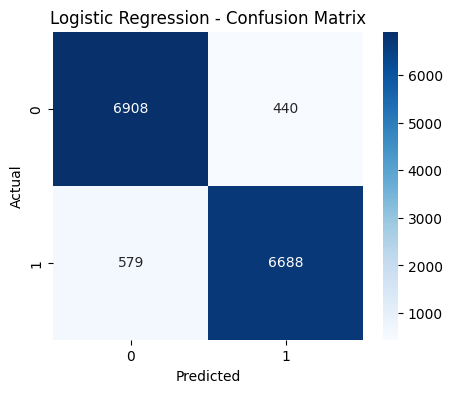

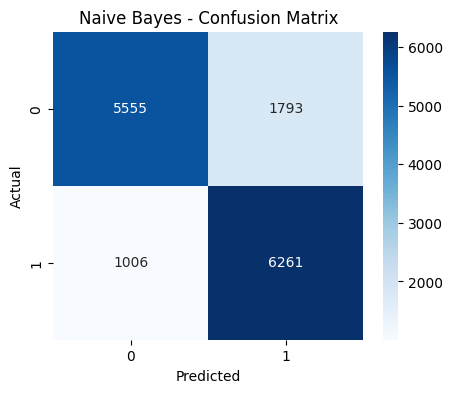

In [16]:
def plot_conf_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred_log, "Logistic Regression - Confusion Matrix")
plot_conf_matrix(y_test, y_pred_nb, "Naive Bayes - Confusion Matrix")

### **ROC Curve Comparison**

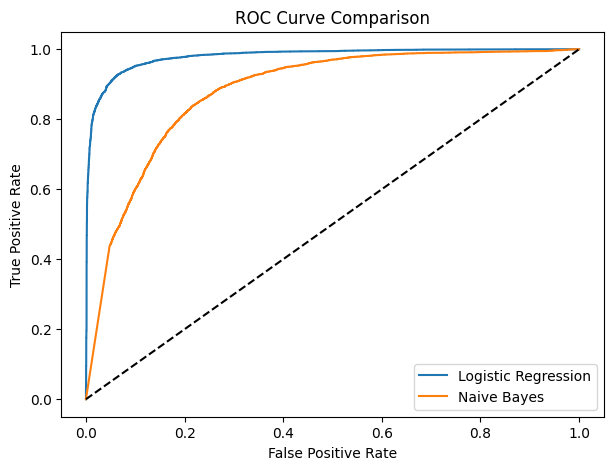

In [17]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### **Feature Importance (Logistic Regression)**

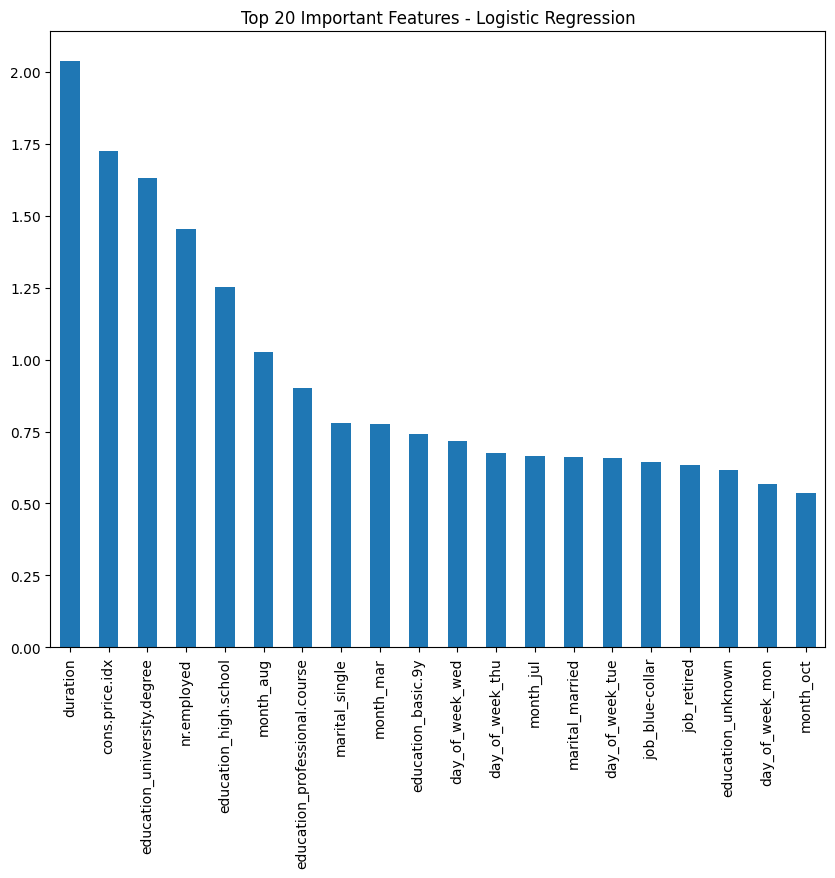

In [18]:
importance = pd.Series(log_model.coef_[0], index=X.columns)
importance = importance.sort_values(ascending=False)

plt.figure(figsize=(10,8))
importance.head(20).plot(kind='bar')
plt.title("Top 20 Important Features - Logistic Regression")
plt.show()

### **PCA Visualization (2 Components)**

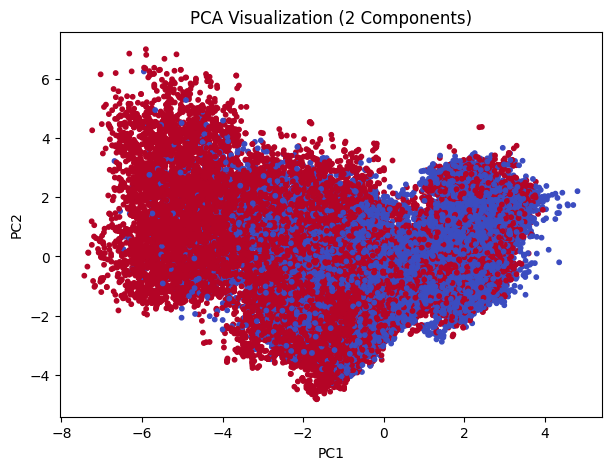

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='coolwarm', s=10)
plt.title("PCA Visualization (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Cross Validation

In [20]:
log_cv = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
nb_cv = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

print("\nCross Validation - Logistic Regression:", log_cv)
print("Mean Accuracy:", log_cv.mean())

print("\nCross Validation - Naive Bayes:", nb_cv)
print("Mean Accuracy:", nb_cv.mean())


Cross Validation - Logistic Regression: [0.92969552 0.93286008 0.93311666 0.93371536 0.93550594]
Mean Accuracy: 0.932978712041477

Cross Validation - Naive Bayes: [0.80850154 0.80422511 0.81277797 0.81337667 0.81892054]
Mean Accuracy: 0.8115603647029964
